# import libraries

In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import colors

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score,silhouette_samples, calinski_harabasz_score, davies_bouldin_score
from sklearn.metrics.pairwise import cosine_similarity
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Read the dataset
df = pd.read_csv('/content/drive/MyDrive/GP-Ai/Family Income and Expenditure.csv')
df.head()

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,Vegetables Expenditure,Restaurant and hotels Expenditure,Alcoholic Beverages Expenditure,Tobacco Expenditure,"Clothing, Footwear and Other Wear Expenditure",Housing and water Expenditure,Imputed House Rental Value,Medical Care Expenditure,Transportation Expenditure,Communication Expenditure,Education Expenditure,Miscellaneous Goods and Services Expenditure,Special Occasions Expenditure,Crop Farming and Gardening expenses,Total Income from Entrepreneurial Acitivites,Household Head Sex,Household Head Age,Household Head Marital Status,Household Head Highest Grade Completed,Household Head Job or Business Indicator,Household Head Occupation,Household Head Class of Worker,Type of Household,Total Number of Family members,Members with age less than 5 year old,Members with age 5 - 17 years old,Total number of family members employed,Type of Building/House,Type of Roof,Type of Walls,House Floor Area,House Age,Number of bedrooms,Tenure Status,Toilet Facilities,Electricity,Main Source of Water Supply,Number of Television,Number of CD/VCD/DVD,Number of Component/Stereo set,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
0,480332,CAR,117848,Wage/Salaries,0,42140,38300,24676,16806,3325,13460,3000,0,0,4607,63636,30000,3457,4776,2880,36200,34056,7200,19370,44370,Female,49,Single,Teacher Training and Education Sciences Programs,With Job/Business,General elementary education teaching professi...,Worked for government/government corporation,Extended Family,4,0,1,1,Single house,"Strong material(galvanized,iron,al,tile,concre...",Strong,80,75,3,Own or owner-like possession of house and lot,"Water-sealed, sewer septic tank, used exclusiv...",1,"Own use, faucet, community water system",1,1,0,1,1,0,0,0,2,1,0,0,1
1,198235,CAR,67766,Wage/Salaries,0,17329,13008,17434,11073,2035,7833,2360,960,2132,8230,41370,27000,3520,12900,5700,29300,9150,1500,0,0,Male,40,Married,Transport Services Programs,With Job/Business,Transport conductors,Worked for private establishment,Single Family,3,0,1,2,Single house,"Strong material(galvanized,iron,al,tile,concre...",Strong,42,15,2,Own or owner-like possession of house and lot,"Water-sealed, sewer septic tank, used exclusiv...",1,"Own use, faucet, community water system",1,1,1,0,1,0,0,0,3,1,0,0,2
2,82785,CAR,61609,Wage/Salaries,1,34182,32001,7783,2590,1730,3795,4545,270,4525,2735,14340,7200,70,324,420,425,6450,500,0,0,Male,39,Married,Grade 3,With Job/Business,Farmhands and laborers,Worked for private establishment,Single Family,6,0,4,3,Single house,"Light material (cogon,nipa,anahaw)",Light,35,12,1,Own or owner-like possession of house and lot,"Water-sealed, sewer septic tank, shared with o...",0,"Shared, faucet, community water system",0,0,0,0,0,0,0,0,0,0,0,0,0
3,107589,CAR,78189,Wage/Salaries,0,34030,28659,10914,10812,690,7887,6280,480,0,1390,16638,6600,60,6840,660,300,3762,500,15580,15580,Male,52,Married,Elementary Graduate,With Job/Business,Rice farmers,Employer in own family-operated farm or business,Single Family,3,0,3,2,Single house,"Light material (cogon,nipa,anahaw)",Light,30,15,1,Own or owner-like possession of house and lot,Closed pit,1,"Own use, faucet, community water system",1,0,0,0,0,0,0,0,1,0,0,0,0
4,189322,CAR,94625,Wage/Salaries,0,34820,30167,18391,11309,1395,11260,6400,1040,0,4620,31122,16800,140,6996,2100,0,8472,1000,18887,75687,Male,65,Married,Elementary Graduate,With Job/Business,General managers/managing proprietors in trans...,Self-employed wihout any employee,Single Family,4,0,0,2,Single house,"Light material (cogon,nipa,an

# Data Cleaning

In [ ]:
# take all the column names with 'expenditures' in it.
expenditures = [column for column in df.columns if 'Expenditure' in column]
expenditures

['Total Food Expenditure',
 'Bread and Cereals Expenditure',
 'Total Rice Expenditure',
 'Meat Expenditure',
 'Total Fish and  marine products Expenditure',
 'Fruit Expenditure',
 'Vegetables Expenditure',
 'Restaurant and hotels Expenditure',
 'Alcoholic Beverages Expenditure',
 'Tobacco Expenditure',
 'Clothing, Footwear and Other Wear Expenditure',
 'Housing and water Expenditure',
 'Medical Care Expenditure',
 'Transportation Expenditure',
 'Communication Expenditure',
 'Education Expenditure',
 'Miscellaneous Goods and Services Expenditure',
 'Special Occasions Expenditure']

In [ ]:
# Creat a new datafram with important columns only
data =df[['Total Household Income','Total Food Expenditure',
 'Bread and Cereals Expenditure',
 'Total Rice Expenditure',
 'Meat Expenditure',
 'Total Fish and  marine products Expenditure',
 'Fruit Expenditure',
 'Vegetables Expenditure',
 'Restaurant and hotels Expenditure',
 'Alcoholic Beverages Expenditure',
 'Tobacco Expenditure',
 'Clothing, Footwear and Other Wear Expenditure',
 'Housing and water Expenditure',
 'Medical Care Expenditure',
 'Transportation Expenditure',
 'Communication Expenditure',
 'Education Expenditure',
 'Miscellaneous Goods and Services Expenditure',
 'Special Occasions Expenditure',
 'Imputed House Rental Value',
 'Total Income from Entrepreneurial Acitivites',
 'Tenure Status',
 'Crop Farming and Gardening expenses',
 'Household Head Sex','Household Head Age','Household Head Marital Status',
 'Total Number of Family members','Members with age less than 5 year old',
 'Members with age 5 - 17 years old']]

In [ ]:
data.shape

(41544, 29)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41544 entries, 0 to 41543
Data columns (total 29 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Total Household Income                         41544 non-null  int64 
 1   Total Food Expenditure                         41544 non-null  int64 
 2   Bread and Cereals Expenditure                  41544 non-null  int64 
 3   Total Rice Expenditure                         41544 non-null  int64 
 4   Meat Expenditure                               41544 non-null  int64 
 5   Total Fish and  marine products Expenditure    41544 non-null  int64 
 6   Fruit Expenditure                              41544 non-null  int64 
 7   Vegetables Expenditure                         41544 non-null  int64 
 8   Restaurant and hotels Expenditure              41544 non-null  int64 
 9   Alcoholic Beverages Expenditure                41544 non-null

In [ ]:
data.describe()

,Total Household Income,Total Food Expenditure,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,Vegetables Expenditure,Restaurant and hotels Expenditure,Alcoholic Beverages Expenditure,Tobacco Expenditure,"Clothing, Footwear and Other Wear Expenditure",Housing and water Expenditure,Medical Care Expenditure,Transportation Expenditure,Communication Expenditure,Education Expenditure,Miscellaneous Goods and Services Expenditure,Special Occasions Expenditure,Imputed House Rental Value,Total Income from Entrepreneurial Acitivites,Crop Farming and Gardening expenses,Household Head Age,Total Number of Family members,Members with age less than 5 year old,Members with age 5 - 17 years old
count,4.154400e+04,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,4.154400e+04,4.154400e+04,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,4.154400e+04,4.154400e+04,4.154400e+04,41544.000000,41544.000000,41544.000000,41544.000000
mean,2.475556e+05,85099.158194,25133.723642,18195.825005,10540.072574,10529.318337,2550.474990,5006.918568,15436.566075,1085.068121,2294.736183,4954.621076,3.837547e+04,7.160231e+03,11806.344454,4095.492057,7473.500481,12522.071635,5265.726001,2.092154e+04,5.437624e+04,1.381686e+04,51.381451,4.635182,0.410216,1.362579
std,2.868805e+05,51637.947682,13466.482984,11727.224350,10497.727757,7812.201613,2969.752879,3300.175236,23705.195929,2174.431913,3998.977131,7496.500945,5.311168e+04,2.690200e+04,19351.213715,7298.822614,21219.170907,17547.027921,13279.593681,3.937152e+04,1.471428e+05,4.764378e+04,14.166081,2.280252,0.694390,1.408000
min,1.128500e+04,2947.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.950000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,9.000000,1.000000,0.000000,0.000000
25%,1.048950e+05,51017.250000,16556.000000,11020.000000,3353.750000,5504.000000,1024.750000,2873.000000,1930.000000,0.000000,0.000000,1365.000000,1.308000e+04,3.000000e+02,2412.000000,564.000000,0.000000,3792.000000,0.000000,6.000000e+03,0.000000e+00,0.000000e+00,41.000000,3.000000,0.000000,0.000000
50%,1.640795e+05,72985.500000,23324.000000,16620.000000,7332.500000,8695.000000,1820.000000,4314.000000,7314.000000,270.000000,300.000000,2740.000000,2.299200e+04,1.125000e+03,6036.000000,1506.000000,880.000000,6804.000000,1500.000000,1.080000e+04,1.922200e+04,0.000000e+00,51.000000,4.000000,0.000000,1.000000
75%,2.911385e+05,105635.500000,31439.000000,23920.000000,14292.000000,13388.000000,3100.000000,6304.250000,19921.250000,1299.250000,3146.500000,5580.000000,4.594800e+04,4.680000e+03,13776.000000,3900.000000,4060.000000,14154.000000,5000.000000,2.400000e+04,6.596875e+04,6.312750e+03,61.000000,6.000000,1.000000,2.000000
max,1.181599e+07,827565.000000,765864.000000,758326.000000,261566.000000,188208.000000,273769.000000,74800.000000,725296.000000,59592.000000,139370.000000,356750.000000,2.188560e+06,1.049275e+06,834996.000000,149940.000000,731000.000000,553560.000000,556700.000000,1.920000e+06,9.234485e+06,3.729973e+06,99.000000,26.000000,5.000000,8.000000


In [ ]:
# Statistical analysis of categorical columns
data.describe(include='object')

,Tenure Status,Household Head Sex,Household Head Marital Status
count,41544,41544,41544
unique,8,2,6
top,Own or owner-like possession of house and lot,Male,Married
freq,29541,32483,31347





## Check null values

In [ ]:
# Check number of null values in each column
data.isnull().sum()

Total Household Income                           0
Total Food Expenditure                           0
Bread and Cereals Expenditure                    0
Total Rice Expenditure                           0
Meat Expenditure                                 0
Total Fish and  marine products Expenditure      0
Fruit Expenditure                                0
Vegetables Expenditure                           0
Restaurant and hotels Expenditure                0
Alcoholic Beverages Expenditure                  0
Tobacco Expenditure                              0
Clothing, Footwear and Other Wear Expenditure    0
Housing and water Expenditure                    0
Medical Care Expenditure                         0
Transportation Expenditure                       0
Communication Expenditure                        0
Education Expenditure                            0
Miscellaneous Goods and Services Expenditure     0
Special Occasions Expenditure                    0
Imputed House Rental Value     

In [ ]:
#Checking that there is no zero value in Total Household Income feature
data[data["Total Household Income"]==0]

,Total Household Income,Total Food Expenditure,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,Vegetables Expenditure,Restaurant and hotels Expenditure,Alcoholic Beverages Expenditure,Tobacco Expenditure,"Clothing, Footwear and Other Wear Expenditure",Housing and water Expenditure,Medical Care Expenditure,Transportation Expenditure,Communication Expenditure,Education Expenditure,Miscellaneous Goods and Services Expenditure,Special Occasions Expenditure,Imputed House Rental Value,Total Income from Entrepreneurial Acitivites,Tenure Status,Crop Farming and Gardening expenses,Household Head Sex,Household Head Age,Household Head Marital Status,Total Number of Family members,Members with age less than 5 year old,Members with age 5 - 17 years old


## Feature engineering

In [ ]:
# Combining age<5 years and age 5-17 years to make column 'number of kids'

data['Number of Kids'] = data['Members with age less than 5 year old'] + data['Members with age 5 - 17 years old']
data.drop(columns = ['Members with age less than 5 year old','Members with age 5 - 17 years old'], inplace = True)
data.columns

Index(['Total Household Income', 'Total Food Expenditure',
       'Bread and Cereals Expenditure', 'Total Rice Expenditure',
       'Meat Expenditure', 'Total Fish and  marine products Expenditure',
       'Fruit Expenditure', 'Vegetables Expenditure',
       'Restaurant and hotels Expenditure', 'Alcoholic Beverages Expenditure',
       'Tobacco Expenditure', 'Clothing, Footwear and Other Wear Expenditure',
       'Housing and water Expenditure', 'Medical Care Expenditure',
       'Transportation Expenditure', 'Communication Expenditure',
       'Education Expenditure', 'Miscellaneous Goods and Services Expenditure',
       'Special Occasions Expenditure', 'Imputed House Rental Value',
       'Total Income from Entrepreneurial Acitivites', 'Tenure Status',
       'Crop Farming and Gardening expenses', 'Household Head Sex',
       'Household Head Age', 'Household Head Marital Status',
       'Total Number of Family members', 'Number of Kids'],
      dtype='object')

In [ ]:
# map the Tenure Status to Rented Or owned
house_category= {
    'Rent house/room including lot': 'Rented',
    'Rent-free house and lot with consent of owner': 'Rented',
    'Rent-free house and lot without consent of owner': 'Rented',
    'Own or owner-like possession of house and lot': 'Owned',
    'Own house, rent-free lot with consent of owner': 'Owned',
    'Own house, rent-free lot without consent of owner': 'Owned',
    'Own house, rent lot': 'Owned',
    'Not Applicable': 'Other'
}

# Apply the mapping to create a new column
data['House Category'] = data['Tenure Status'].replace(house_category)
data.drop(columns =['Tenure Status'],inplace = True)
data['House Category'].value_counts()

House Category
Owned     37126
Rented     4345
Other        73
Name: count, dtype: int64

In [ ]:
# map the values of 'Divorced/Separated', 'Annulled to divorced
marital_status={
    'Divorced/Separated':'Divorced',
    'Annulled':'Divorced'}
data['Marital Status'] = data['Household Head Marital Status'].replace(marital_status)
data.drop(columns =['Household Head Marital Status'], inplace = True)
data['Marital Status'].value_counts()

Marital Status
Married     31347
Widowed      6818
Single       1942
Divorced     1436
Unknown         1
Name: count, dtype: int64

In [ ]:
# combining 'Tobacco Expenditure','Alcoholic Beverages Expenditure' with 'Special Occasions Expenditure' column
data["Special Occasions Expenditure"]=data["Tobacco Expenditure"]+data["Alcoholic Beverages Expenditure"]+data["Special Occasions Expenditure"]
data.drop(columns = ['Tobacco Expenditure','Alcoholic Beverages Expenditure'], inplace = True)
data["Special Occasions Expenditure"].head()

0    7200
1    4592
2    5295
3     980
4    2040
Name: Special Occasions Expenditure, dtype: int64

In [ ]:
# map the vaues of the categories
category_mapping = {
    'housing': ['Housing and water Expenditure', 'Imputed House Rental Value'],
    'bills & utilities': ['Communication Expenditure'],
    'shopping': ['Clothing, Footwear and Other Wear Expenditure'],
    'food & drinks': ['Bread and Cereals Expenditure', 'Total Rice Expenditure',
                        'Meat Expenditure', 'Total Fish and  marine products Expenditure', 'Fruit Expenditure',
                        'Vegetables Expenditure','Restaurant and hotels Expenditure','Crop Farming and Gardening expenses'],
    'life & entertainment': ['Medical Care Expenditure', 'Education Expenditure',
                              'Miscellaneous Goods and Services Expenditure', 'Special Occasions Expenditure'],
    'vehicle': ['Transportation Expenditure']
}
# Group the columns based on categories and drop the original columns
for category, columns in category_mapping.items():
    data[category] = data[columns].sum(axis=1)
    data.drop(columns, axis=1, inplace=True)

data.head()

,Total Household Income,Total Food Expenditure,Total Income from Entrepreneurial Acitivites,Household Head Sex,Household Head Age,Total Number of Family members,Number of Kids,House Category,Marital Status,housing,bills & utilities,shopping,food & drinks,life & entertainment,vehicle
0,480332,117848,44370,Female,49,4,1,Owned,Single,93636,2880,4607,161077,80913,4776
1,198235,67766,0,Male,40,3,1,Owned,Married,68370,5700,8230,71072,46562,12900
2,82785,61609,0,Male,39,6,4,Owned,Married,21540,420,2735,86626,12240,324
3,107589,78189,15580,Male,52,3,3,Owned,Married,23238,660,1390,114852,5102,6840
4,189322,94625,75687,Male,65,4,0,Owned,Married,47922,2100,4620,132629,10652,6996


In [ ]:
# drop not needed column
data.drop(['Household Head Sex','Household Head Age','Total Food Expenditure','Total Income from Entrepreneurial Acitivites'],axis=1,inplace=True)

In [ ]:
data.shape

(41544, 11)

## Handeling outliers

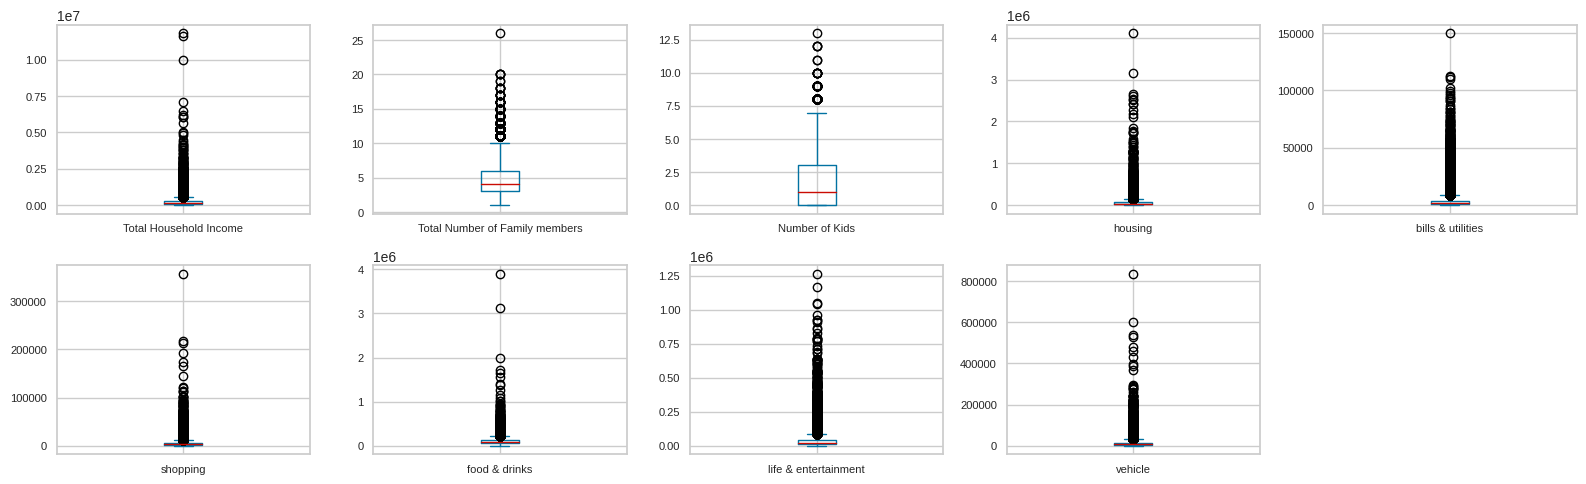

In [ ]:
# exclude categorical data and creat a new datafarme to handel the outliers
data_numric=data.select_dtypes(exclude='object')
#boxploting each feature
fig, axes = plt.subplots(figsize=(16, 12))
data_numric.plot(kind='box', subplots=True, layout=(5, 5), ax=axes, fontsize=8)
fig.tight_layout(pad=1.0)
plt.show()

<Axes: xlabel='Total Household Income'>

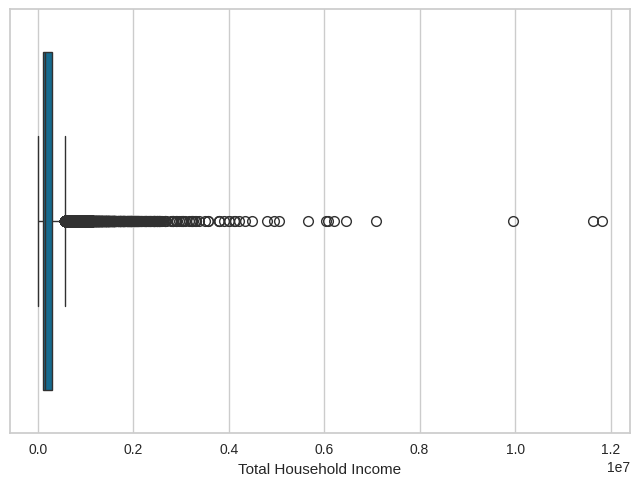

In [ ]:
# Boxploting "Total Household Income" feature
sns.boxplot(x=data_numric["Total Household Income"])

<Axes: xlabel='Total Household Income'>

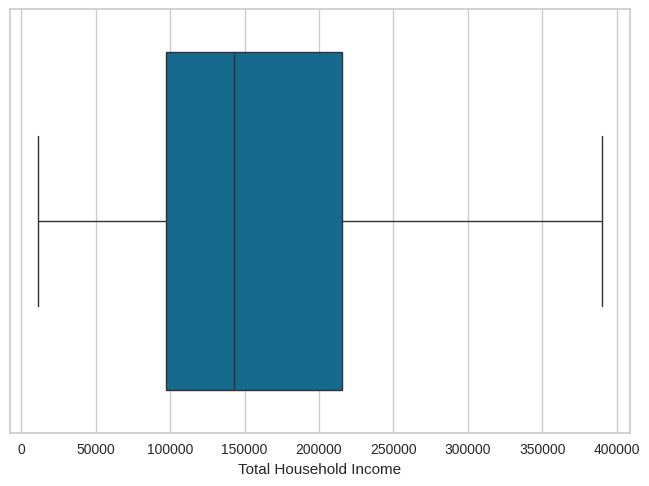

In [ ]:
# Handling the outliers by removing them
data=data[data["Total Household Income"]<390000]
sns.boxplot(x=data["Total Household Income"])

<Axes: xlabel='Total Number of Family members'>

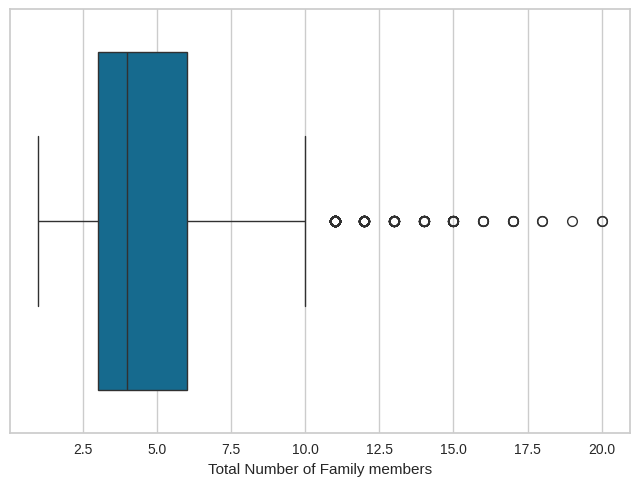

In [ ]:
# Boxploting "Total Number of Family members" feature
sns.boxplot(x=data["Total Number of Family members"])

<Axes: xlabel='Total Number of Family members'>

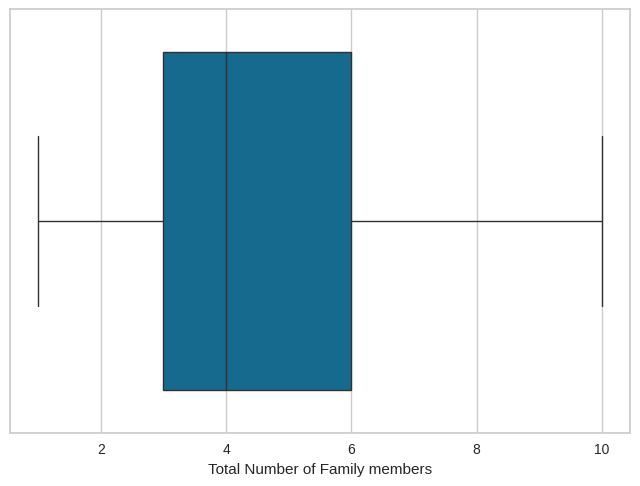

In [ ]:
# Handling the outliers by removing them
data=data[data["Total Number of Family members"]<=10]
sns.boxplot(x=data["Total Number of Family members"])

<Axes: xlabel='Number of Kids'>

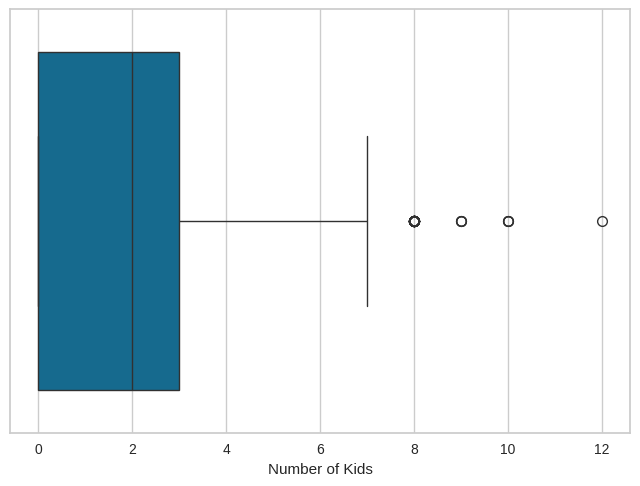

In [ ]:
# Boxploting "Number of Kids" feature
sns.boxplot(x=data["Number of Kids"])

<Axes: xlabel='Number of Kids'>

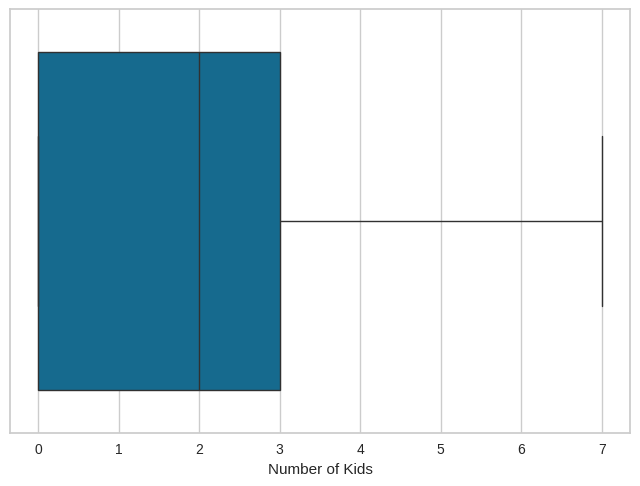

In [ ]:
# Handling the outliers by removing them
data=data[data["Number of Kids"]<=7]
sns.boxplot(x=data["Number of Kids"])

<Axes: xlabel='housing'>

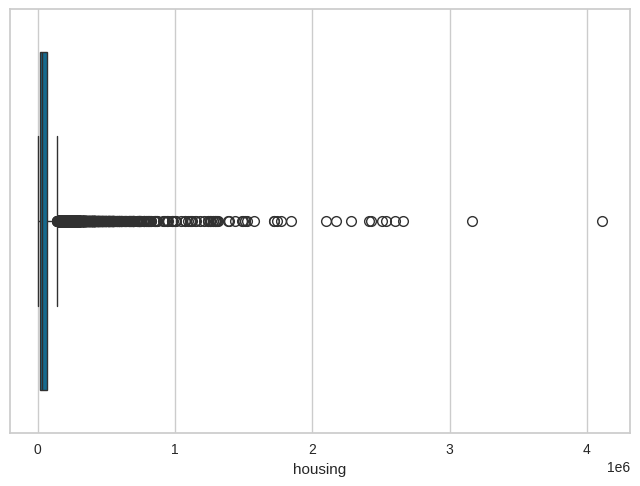

In [ ]:
# Boxploting "housing" feature
sns.boxplot(x=data_numric["housing"])

<Axes: xlabel='housing'>

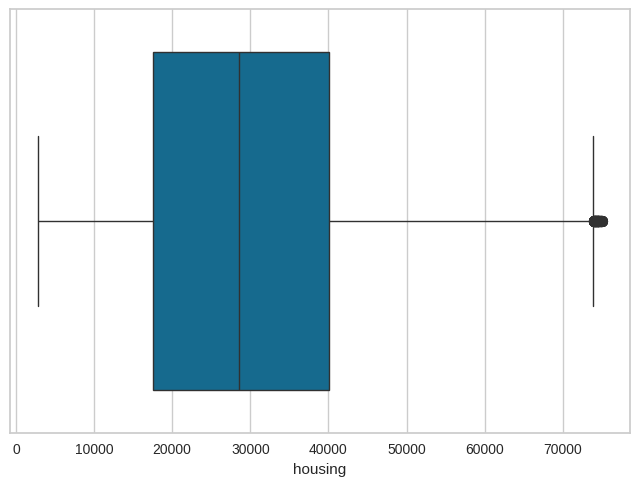

In [ ]:
# Handling the outliers by replacing them with the mean of the feature
data.loc[data["housing"] >= 75000, "housing"] = data["housing"].mean()

# Plot boxplot to check for outliers
sns.boxplot(x=data["housing"])

<Axes: xlabel='bills & utilities'>

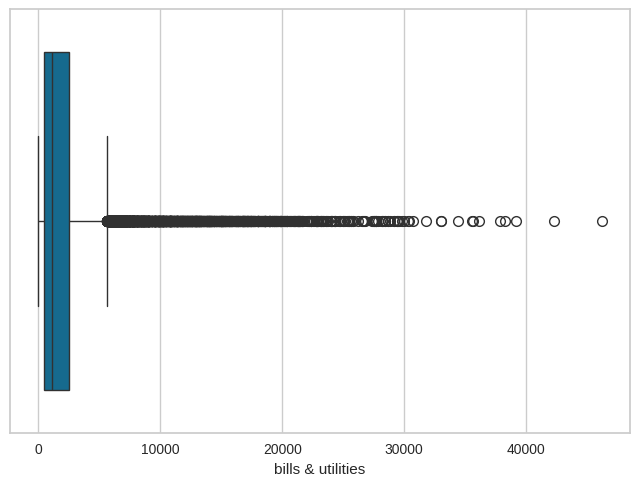

In [ ]:
# Boxploting "bills & utilities" feature
sns.boxplot(x=data["bills & utilities"])

<Axes: xlabel='bills & utilities'>

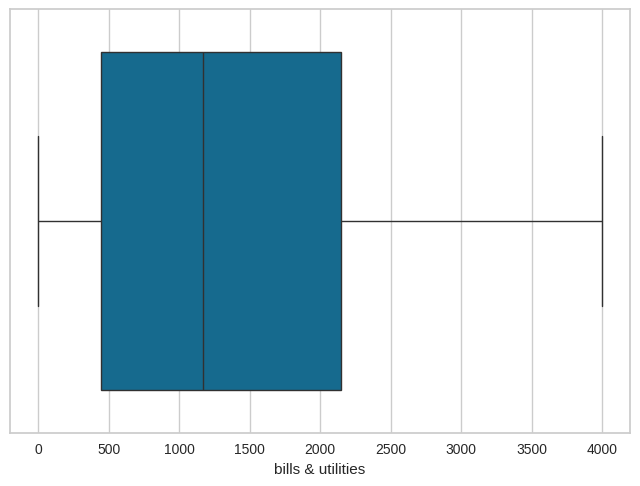

In [ ]:
# Handling the outliers by replacing them with the mean of the feature
data.loc[data["bills & utilities"] >= 4000, "bills & utilities"] = data["bills & utilities"].mean()

# Plot boxplot to check for outliers
sns.boxplot(x=data["bills & utilities"])

<Axes: xlabel='shopping'>

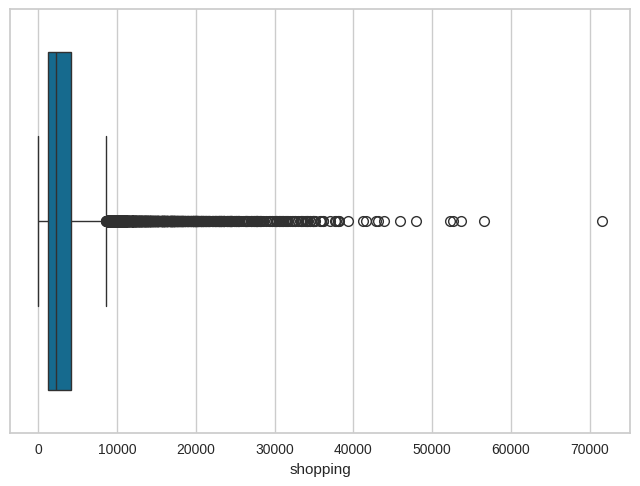

In [ ]:
# Boxploting "shopping" feature
sns.boxplot(x=data["shopping"])

<Axes: xlabel='shopping'>

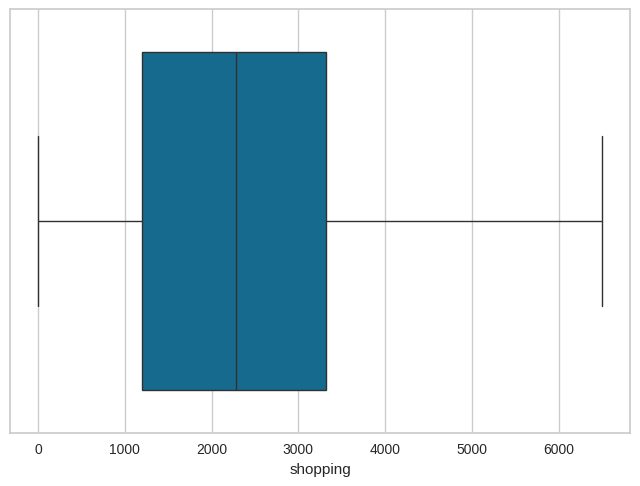

In [ ]:
#Handling the outliers by replacing them with the mean of the feature
data.loc[data["shopping"] >= 6500, "shopping"] = data["shopping"].mean()

# Plot boxplot to check for outliers
sns.boxplot(x=data["shopping"])

<Axes: xlabel='food & drinks'>

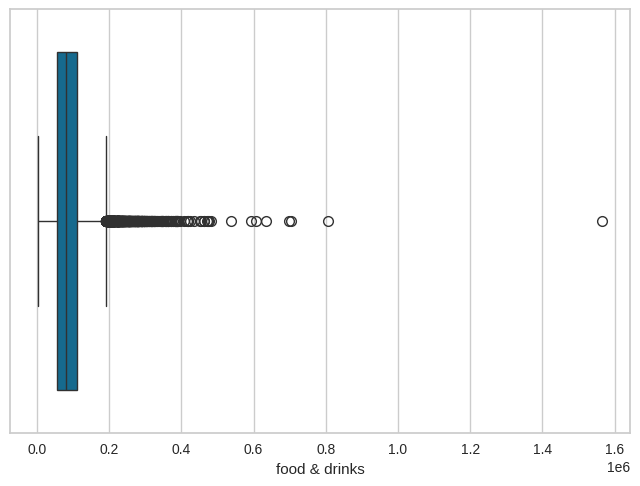

In [ ]:
# Boxploting "food $ drinks" feature
sns.boxplot(x=data["food & drinks"])

<Axes: xlabel='food & drinks'>

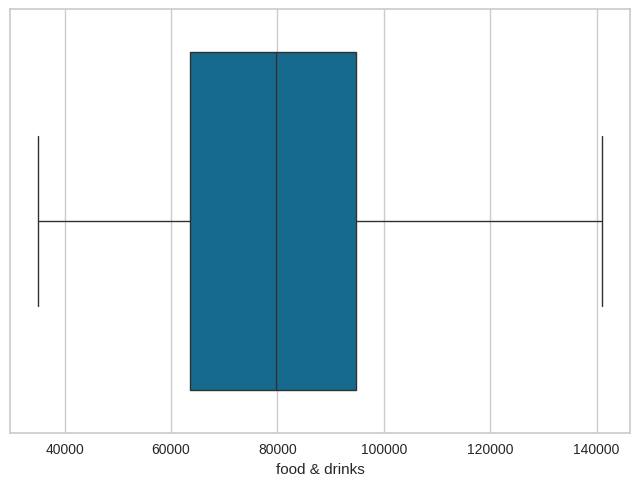

In [ ]:
#Handling the outliers by replacing them with the mean of the feature
data.loc[data["food & drinks"] >= 141000, "food & drinks"] = data["food & drinks"].mean()
data.loc[data["food & drinks"] <= 35000, "food & drinks"] = data["food & drinks"].mean()

# Plot boxplot to check for outliers
sns.boxplot(x=data["food & drinks"])

<Axes: xlabel='life & entertainment'>

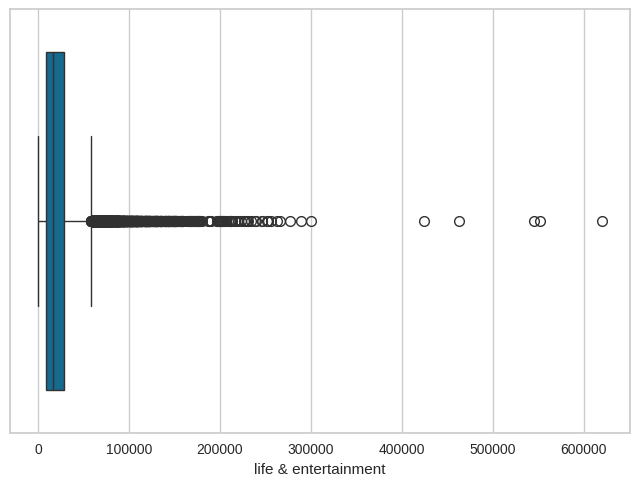

In [ ]:
sns.boxplot(x=data["life & entertainment"])

<Axes: xlabel='life & entertainment'>

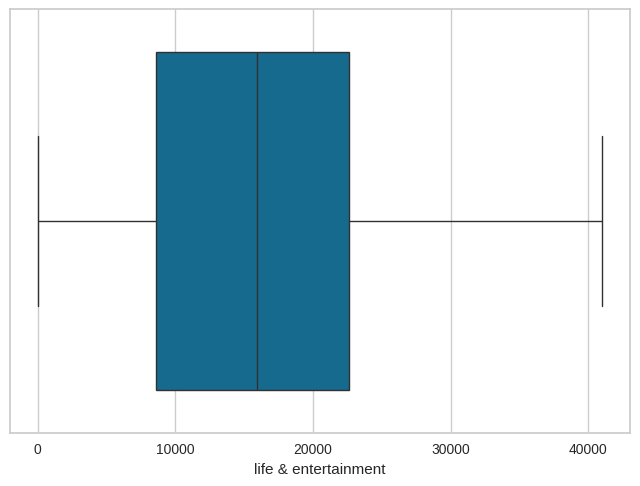

In [ ]:
#Handling the outliers by replacing them with the mean of the feature
data.loc[data["life & entertainment"] >= 41000, "life & entertainment"] = data["life & entertainment"].mean()

# Plot boxplot to check for outliers
sns.boxplot(x=data["life & entertainment"])

<Axes: xlabel='vehicle'>

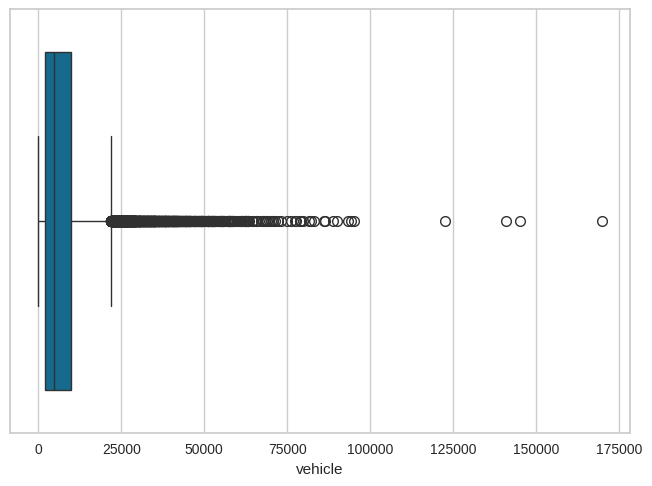

In [ ]:
sns.boxplot(x=data["vehicle"])

<Axes: xlabel='vehicle'>

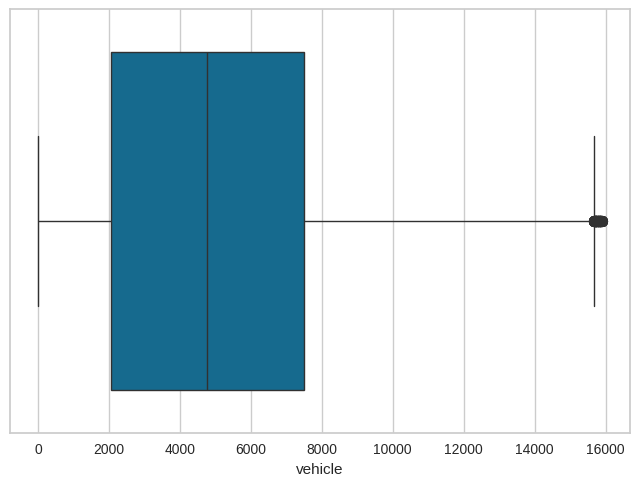

In [ ]:
#Handling the outliers by replacing them with the mean of the feature
data.loc[data["vehicle"] >= 15900, "vehicle"] = data["vehicle"].mean()

# Plot boxplot to check for outliers
sns.boxplot(x=data["vehicle"])

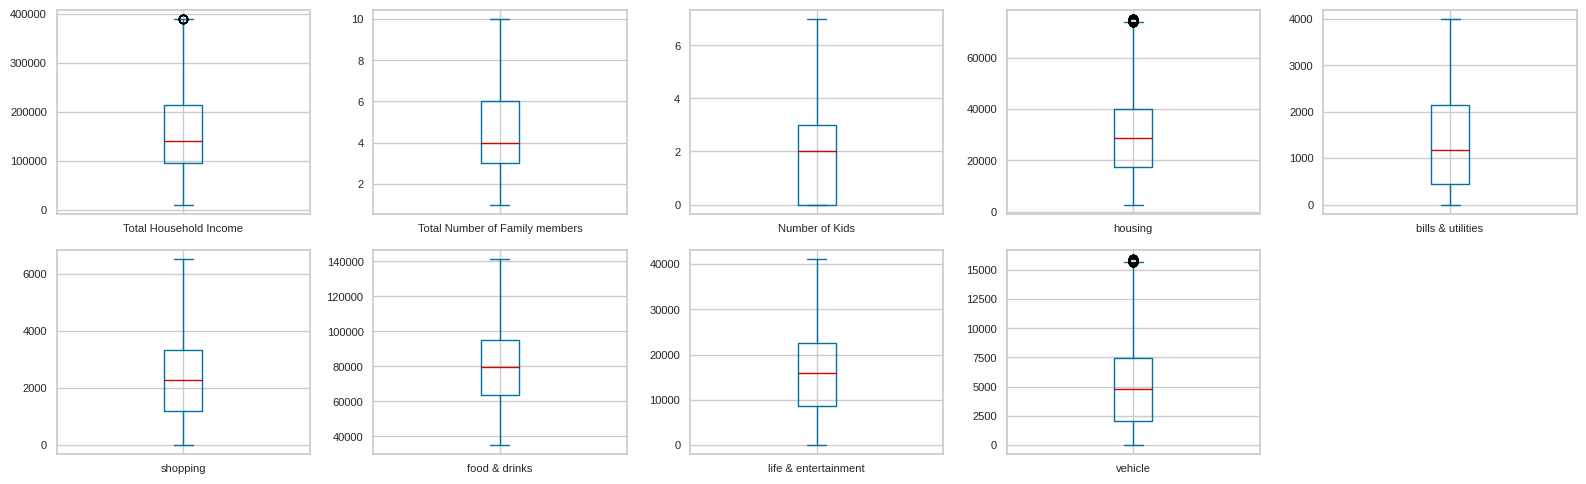

In [ ]:
# exclude categorical data and creat a new datafarme to handel the outliers
data_numric=data.select_dtypes(exclude='object')
#boxploting each feature
fig, axes = plt.subplots(figsize=(16, 12))
data_numric.plot(kind='box', subplots=True, layout=(5, 5), ax=axes, fontsize=8)
fig.tight_layout(pad=1.0)
plt.show()

In [ ]:
data.shape

(34484, 11)

In [ ]:
# Save the preprocessed data to a CSV file
data.to_csv('preprocessed_data.csv', index=False)


In [ ]:
# Load the preprocessed data
deploy_data = pd.read_csv('preprocessed_data.csv')

## Label encoding categorical variables

In [ ]:
#Get list of categorical variables
s = (data.dtypes == 'object')
object_cols = list(s[s].index)
#Label Encoding
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
#Label Encoding object dtypes to numeric dtypes
for i in object_cols:
    data[i]=data[[i]].apply(LE.fit_transform)

In [ ]:
data.dtypes

Total Household Income              int64
Total Number of Family members      int64
Number of Kids                      int64
House Category                      int64
Marital Status                      int64
housing                           float64
bills & utilities                 float64
shopping                          float64
food & drinks                     float64
life & entertainment              float64
vehicle                           float64
dtype: object

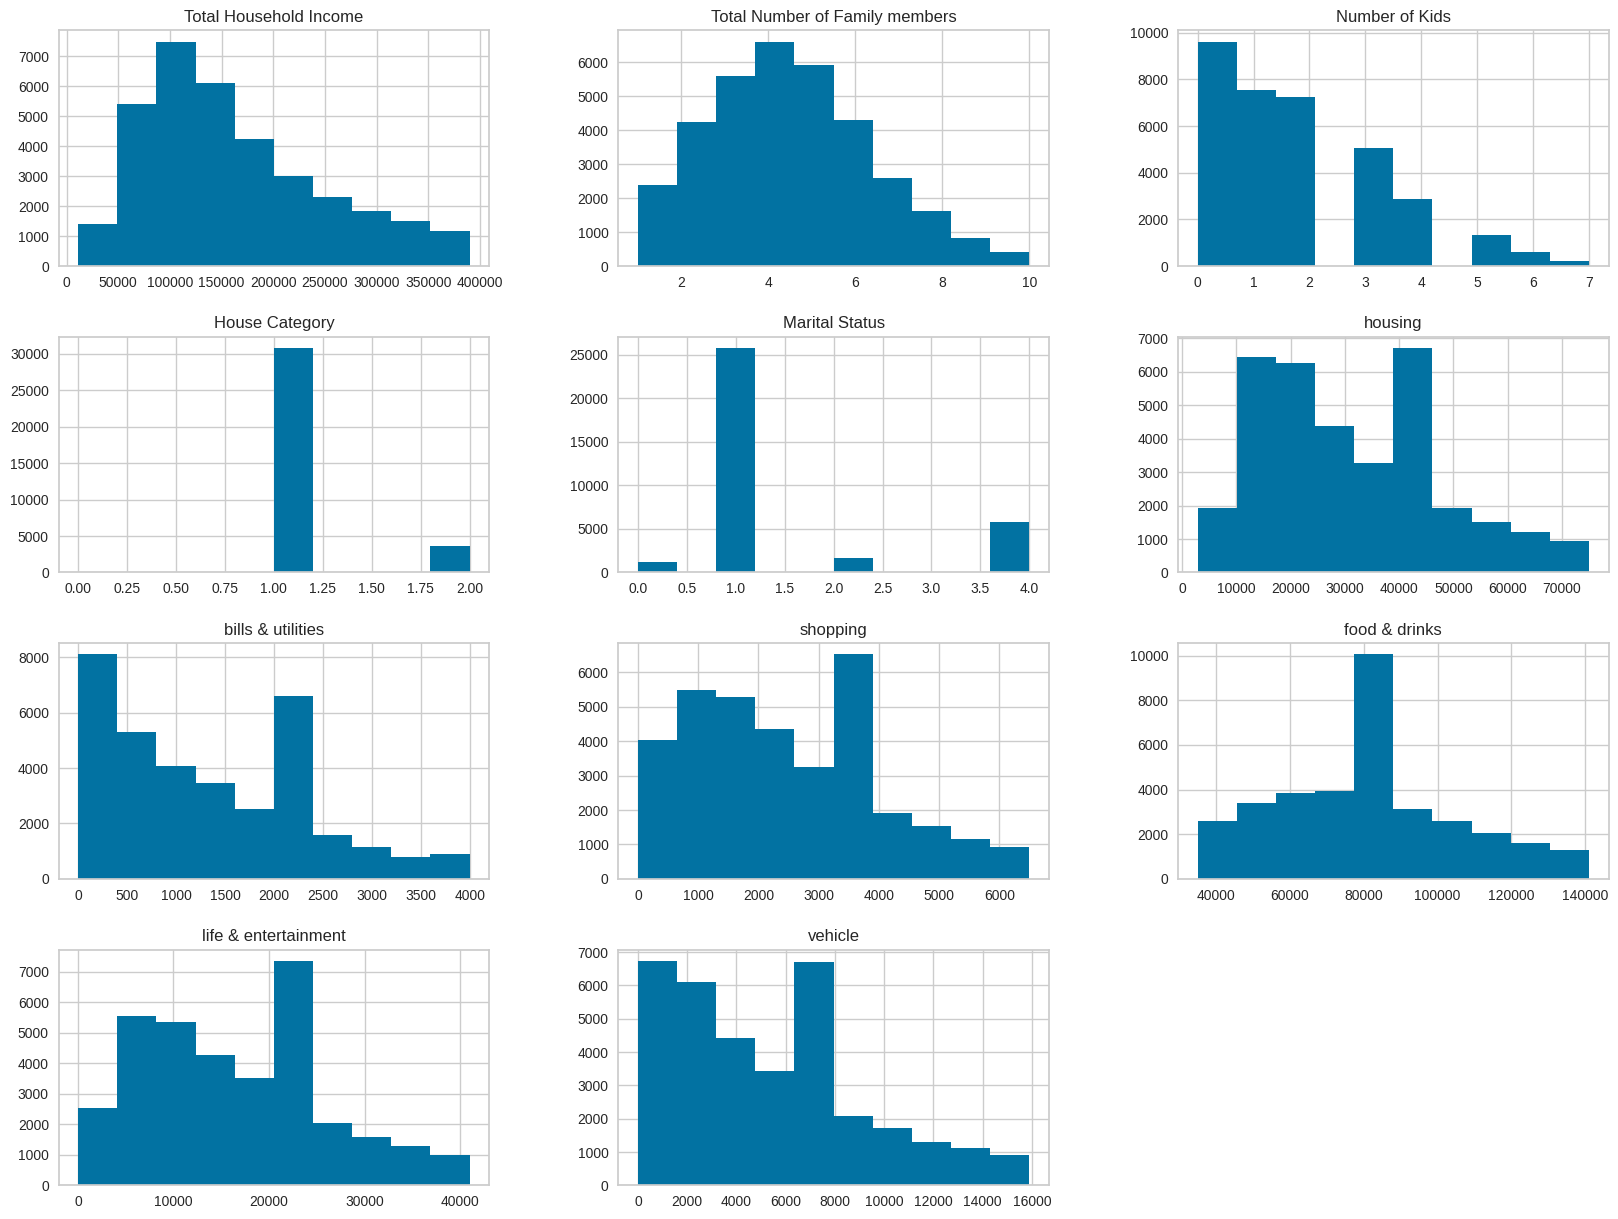

In [ ]:
#Visualizing the features to know the distribution for each one of them
data.hist(figsize=(20,15))
plt.show()

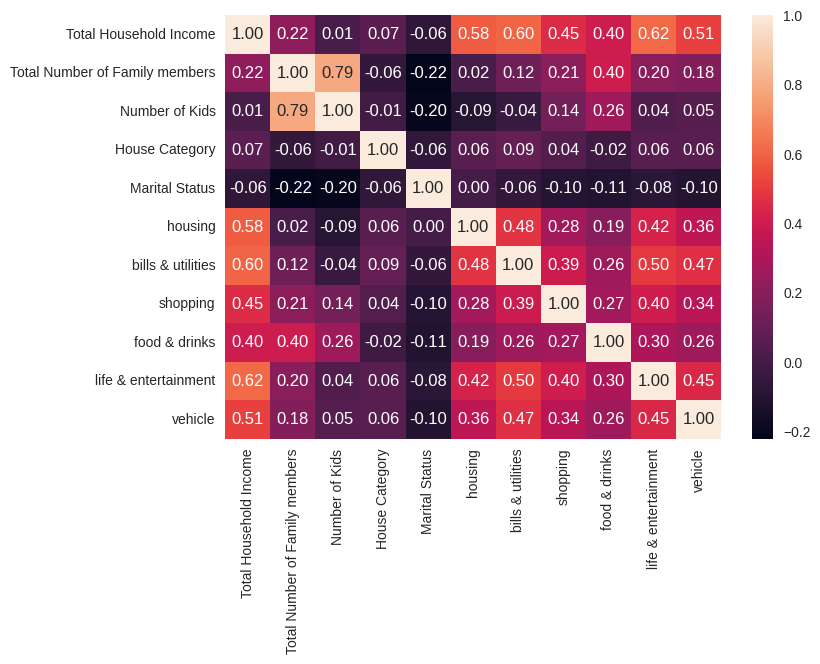

<Figure size 1200x1000 with 0 Axes>

In [ ]:
# Plot the correlation matrix with numeric values
sns.heatmap(data.corr(), annot=True, fmt='.2f' )

# Display the plot
plt.figure(figsize=(12, 10))
plt.show()

# PCA
By reducing the number of features, we’re improving the performance of our algorithm. On top of that, by decreasing the number of features the noise is also reduced

using PCA
Principal component analysis (PCA): is a technique for reducing the dimensionality of datasets, increasing interpretability but at the same time minimizing information loss.

In [ ]:
#Initiating PCA to reduce dimentions aka features to 5
pca = PCA(n_components=5)
#fit the model and apply the dimensionality reduction on dataset
data_pca = pca.fit_transform(data)
# Creating a new dataframe from the PCA dataframe, with columns labeled PC1, PC2, etc.
data_pca = pd.DataFrame(data_pca, columns=['PC'+str(i+1) for i in range(pca.n_components_)])
# view the new dataframe
data_pca.head()


,PC1,PC2,PC3,PC4,PC5
0,39028.204499,-16384.485320,32771.196428,1694.247746,5906.236828
1,-78898.759633,14669.555476,16.604268,303.212036,-3385.870495
2,-51307.362091,39630.448089,-474.061963,-8666.119509,3100.697479
3,34354.795310,46598.816892,15281.282108,-10412.126984,1186.070800
4,-8966.981169,9285.201062,-925.372604,-9792.396894,-245.049622


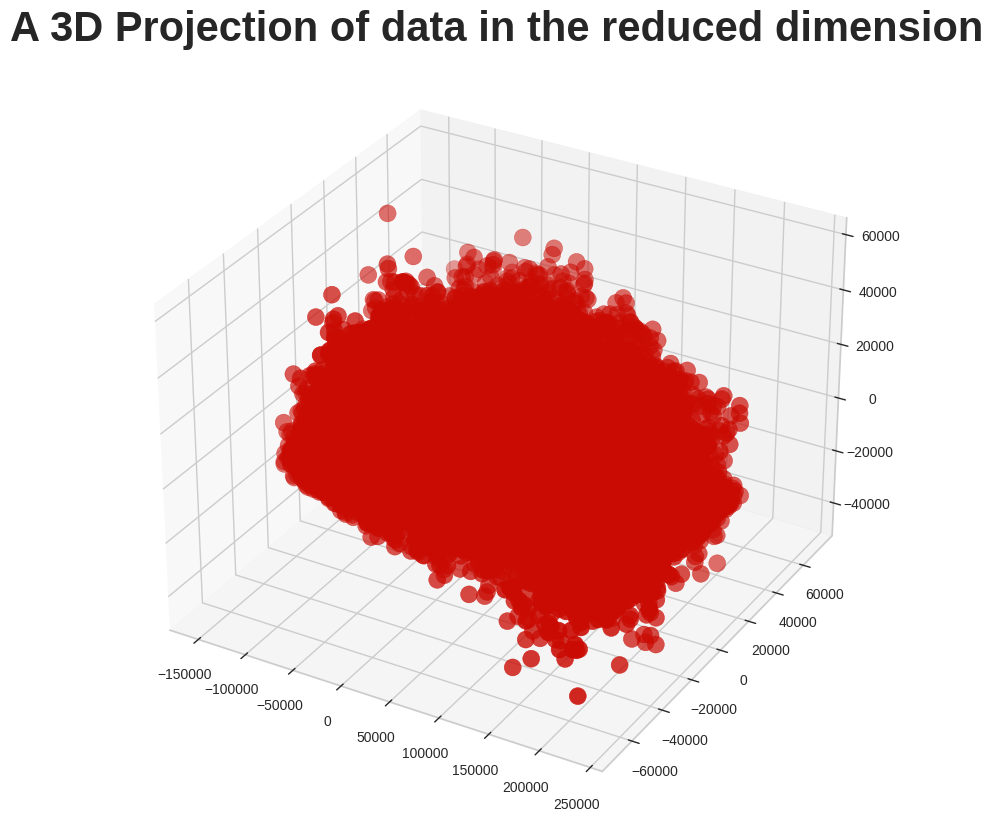

In [ ]:
#A 3D Projection Of Data In The Reduced Dimension
x=data_pca['PC1']
y=data_pca['PC2']
z=data_pca['PC3']
w=data_pca['PC4']
v=data_pca['PC5']



# Scatter Plotting PCA
fig=plt.figure(figsize=(12,10))
xyz=fig.add_subplot(111,projection="3d")
xyz.scatter(x,y,z,s=150, c='r' , marker="o")
xyz.set_title("A 3D Projection of data in the reduced dimension",fontsize=30,weight='bold')
plt.show()

# Clustering

## Elbow method & Silhouette Score

Elbow Method to determine the number of clusters to be formed:


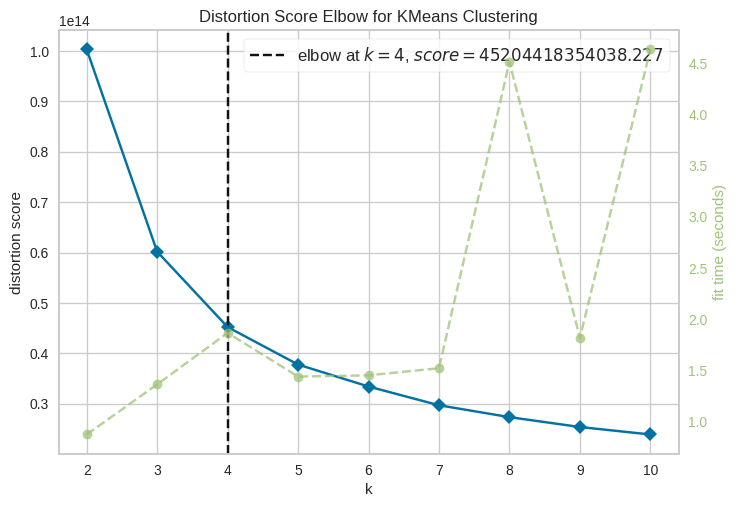

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(data_pca)
Elbow_M.show()

**number of clusters using Elbow method=4**

In [ ]:
#definig array includes scores for each K
silhouetteScore=[]
#apply Kmeans for each number of clusters from 2 to 10
for i in range(2,10):
    kmeans = KMeans(i)
    #fit the model
    kmeans.fit(data_pca)
    #predict the clusters
    x_kmeans = kmeans.predict(data_pca)
    #assigning the cluster feature to the data in the PCA
    data_pca["Clusters"]=x_kmeans
    #assigning the clusters feature to the orignal dataframe.
    data["Clusters"]=x_kmeans
    #calculate the silhouette score
    score = silhouette_score(data_pca, kmeans.labels_, metric='euclidean')
    #add each score to the array
    silhouetteScore.append(score)
    #add each score to the array
    print("At k = ", i , " Silhouette Score: ",score)

At k =  2  Silhouette Score:  0.5548765052910285
At k =  3  Silhouette Score:  0.4403504604073758
At k =  4  Silhouette Score:  0.3737862171907317
At k =  5  Silhouette Score:  0.3295984402996926
At k =  6  Silhouette Score:  0.3205917932457943
At k =  7  Silhouette Score:  0.29666859647898686
At k =  8  Silhouette Score:  0.27698027622388527
At k =  9  Silhouette Score:  0.2678345944911458


In [ ]:
# Determine the number of rows and columns for subplots
num_clusters = range(2, 10)
num_plots = len(num_clusters)
num_cols = 2
num_rows = num_plots // num_cols + (num_plots % num_cols > 0)

fig, ax = plt.subplots(num_rows, num_cols, figsize=(15, 8))

# Instantiate the clustering model and visualizer
for i, n_clusters in enumerate(num_clusters):
    row = i // num_cols
    col = i % num_cols
    kmeans = KMeans(n_clusters=n_clusters)
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick', ax=ax[row][col])

    # Fit the data to the visualizer
    visualizer.fit(data_pca)

    # Add the Silhouette score as text to the plot
    ax[row][col].text(0.8, 0.9, f'Silhouette Score: {visualizer.silhouette_score_:.2f}', transform=ax[row][col].transAxes, fontsize=12)

plt.tight_layout()
plt.show()

## Kmeans algorithm

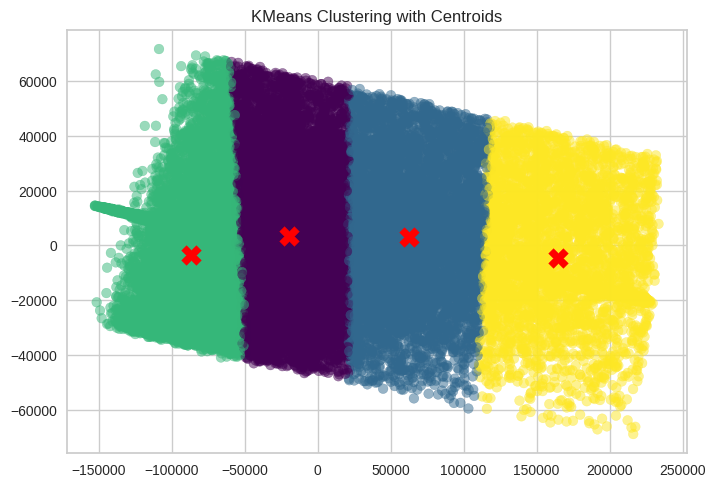

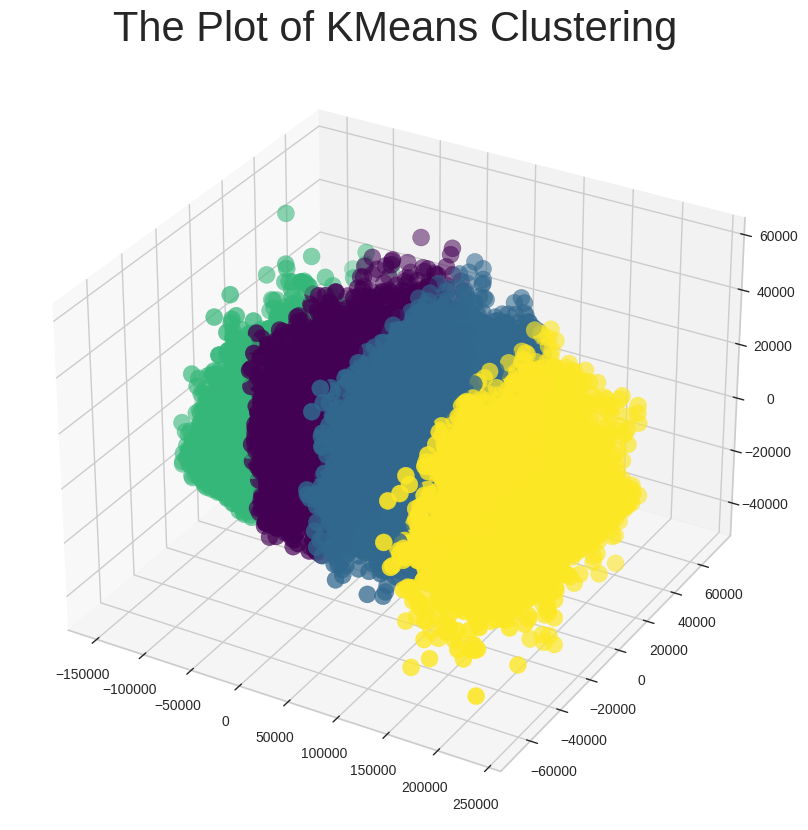

In [ ]:
kmeans = KMeans(n_clusters=4)  # apply kmeans using 4 clusters
# fit model and predict clusters
kmeans_model=kmeans.fit_predict(data_pca)
#Assigning the cluster feature to the Data In The Reduced Dimension
data_pca["Clusters"]=kmeans_model
#Assigning the Clusters feature to the orignal dataframe.
data["Clusters"]=kmeans_model

# Get centroids
centroids = kmeans.cluster_centers_

# Plotting the clusters
plt.scatter(data_pca.iloc[:, 0], data_pca.iloc[:, 1], c=kmeans_model, cmap='viridis', alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200)  # Plot centroids
plt.title('KMeans Clustering with Centroids')
plt.show()
# 3D projection plotting the clusters in Dataset
fig=plt.figure(figsize=(12,10))
plot=plt.subplot(111,projection='3d',label="bla")
plot.set_title("The Plot of KMeans Clustering",fontsize=30)
plot.scatter(x,y,z,s=150,c=kmeans_model,marker='o', cmap='viridis',zorder=10)
plt.show()

In [ ]:
# Display the first 10 rows of the original dataframe
data.head(10)

,Total Household Income,Total Number of Family members,Number of Kids,House Category,Marital Status,housing,bills & utilities,shopping,food & drinks,life & entertainment,vehicle,Clusters
1,198235,3,1,1,1,68370.0,2145.468391,3322.336736,71072.000000,22615.264586,12900.0,1
2,82785,6,4,1,1,21540.0,420.000000,2735.000000,86626.000000,12240.000000,324.0,2
3,107589,3,3,1,1,23238.0,660.000000,1390.000000,114852.000000,5102.000000,6840.0,0
4,189322,4,0,1,1,47922.0,2100.000000,4620.000000,132629.000000,10652.000000,6996.0,1
5,152883,4,0,1,1,29382.0,1500.000000,1930.000000,89812.000000,6509.000000,4044.0,0
6,198621,5,1,1,1,36126.0,1848.000000,3322.336736,87990.785147,14786.000000,12696.0,1
7,134961,5,2,1,1,60576.0,3000.000000,4085.000000,87990.785147,7667.000000,4140.0,0
8,171152,2,2,1,2,12570.0,1800.000000,2780.000000,74266.000000,15210.000000,7200.0,0
10,147005,4,2,1,1,40668.0,1080.000000,5610.000000,87990.785147,11611.000000,3678.0,0
11,253130,7,3,1,1,22998.0,2145.468391,3322.336736,87990.785147,19631.000000,2940.0,1


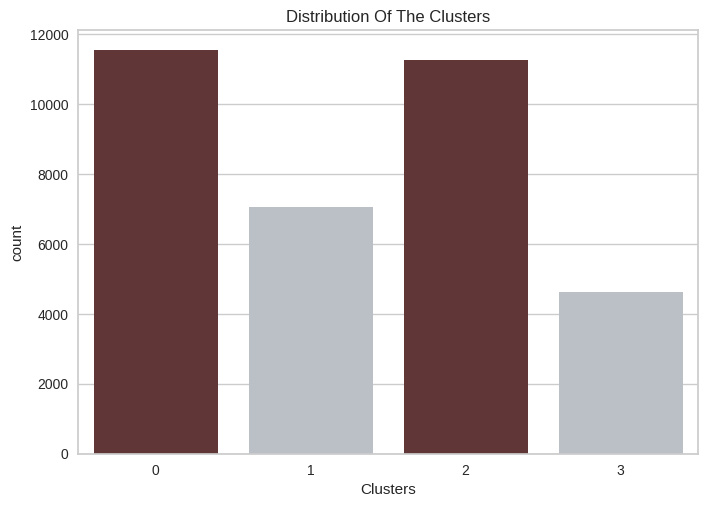

In [ ]:
#Plotting countplot of clusters to show how they are distributed
pal = ["#682F2F","#B9C0C9"]
pl = sns.countplot(x=data["Clusters"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

## Evaluation

Silhouetter Score:Higher values indicate better cluster separation between [-1,1].

Calinski Harabasz Score:A higher score indicates better defined clusters.

Davies Bouldin Score:Lower values indicate better cluster separation.

In [ ]:
#evaluation metrices
# Separate the features and the cluster labels
X = data_pca.drop('Clusters', axis=1)
clusters = data_pca['Clusters']

# Compute the metrics
sil_score = silhouette_score(X, clusters)
print('Silhouetter Score for Kmeans Clustering Model : %.3f' % sil_score)
calinski_score = calinski_harabasz_score(X, clusters)
print('Calinski Harabasz Score for Kmeans Clustering Model : %.3f' % calinski_score)
davies_score = davies_bouldin_score(X, clusters)
print('Davies Bouldin Score for Kmeans Clustering Model : %.3f' % davies_score)

## Clusters profiling

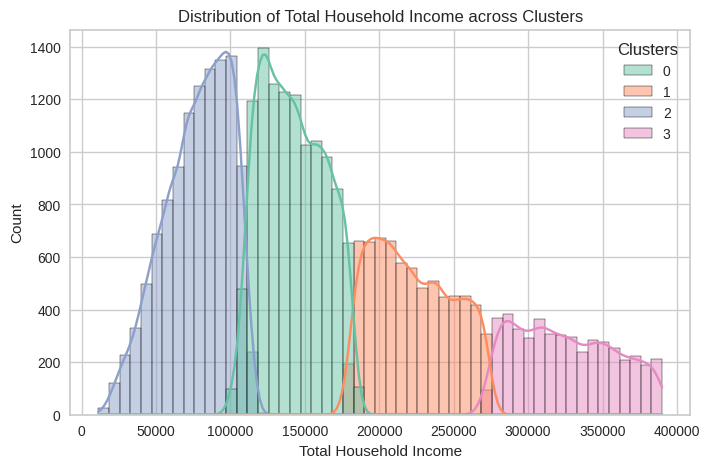

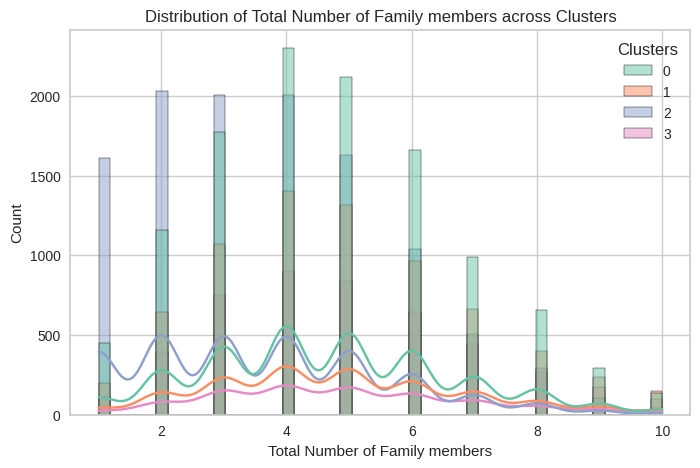

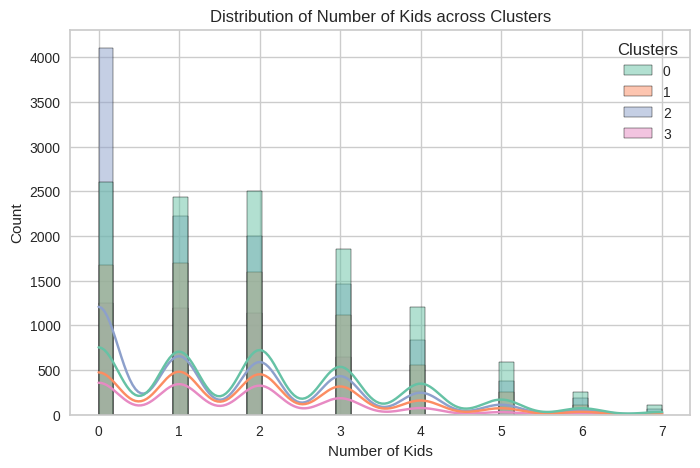

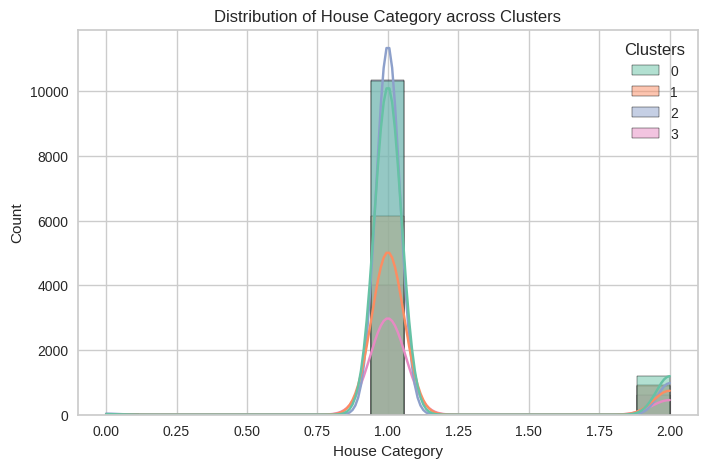

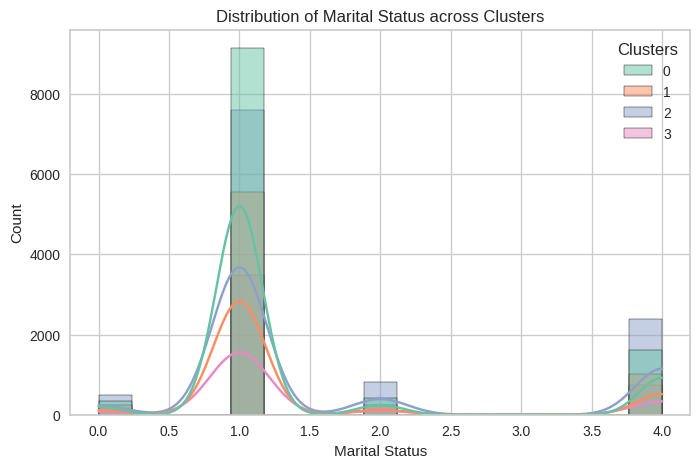

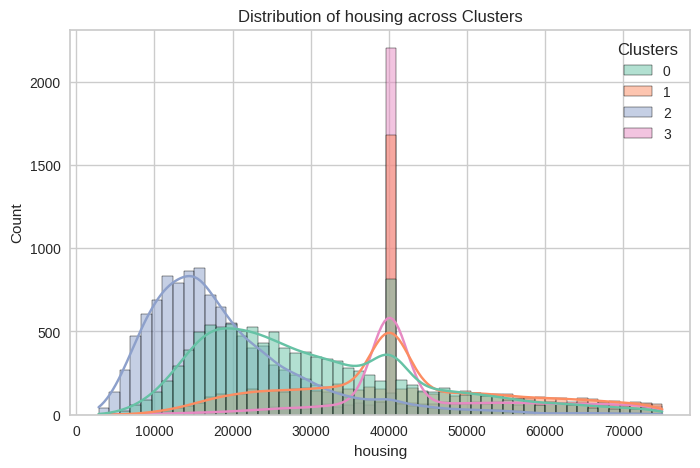

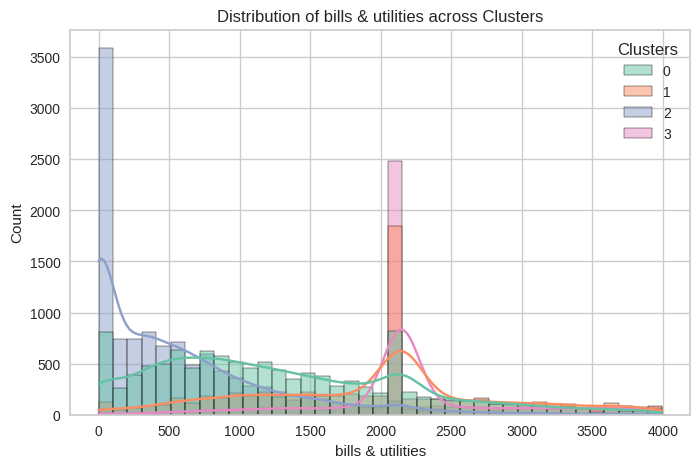

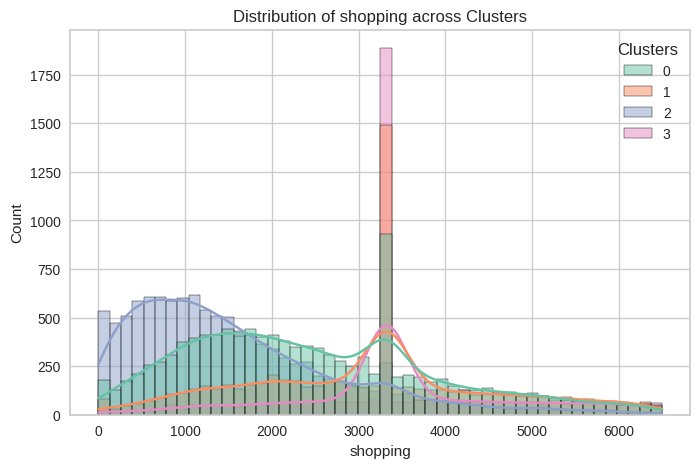

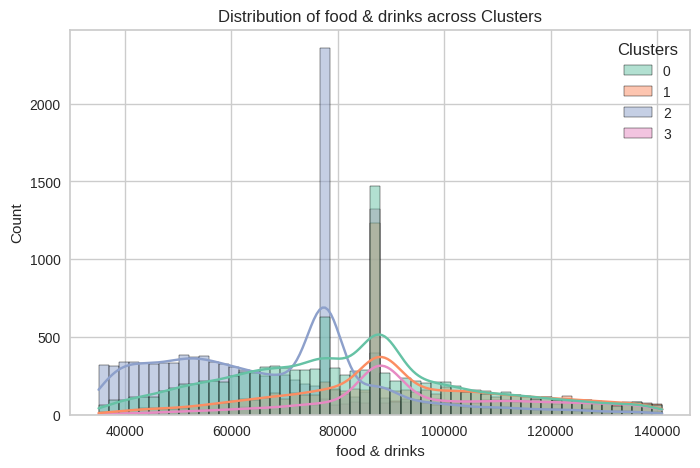

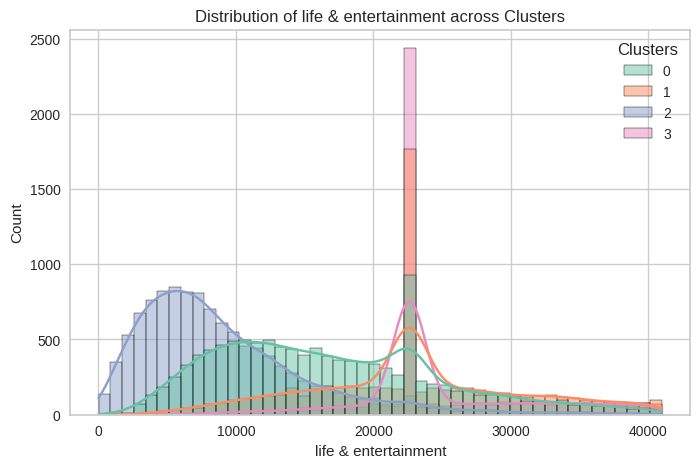

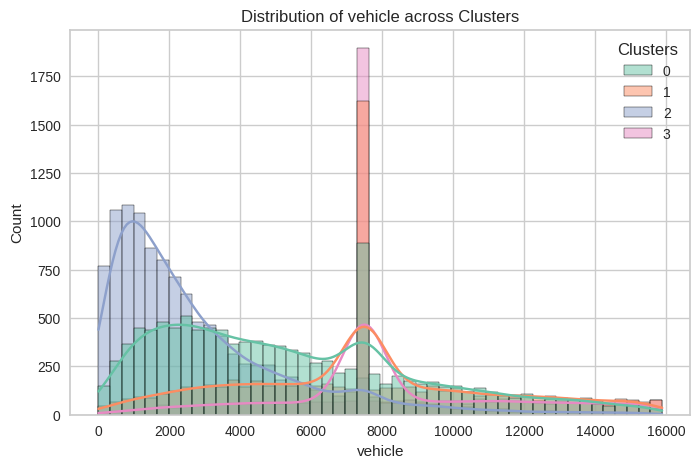

In [ ]:
# Plot feature distribution for each cluster
for feature in data.columns[:-1]:  # Exclude the 'Clusters' column
    plt.figure(figsize=(8, 5))
    sns.histplot(data=data, x=feature, hue='Clusters', kde=True,palette="Set2")
    plt.title(f'Distribution of {feature} across Clusters')
    plt.show()

# Recommendation System

In [ ]:
# User Similarity
user_similarity = cosine_similarity(data.drop(columns=['Clusters']).values)

In [ ]:
np.save('user_similarity.npy', user_similarity)
# Download the file
files.download('user_similarity.npy')

NameError: name 'files' is not defined

In [ ]:
# create a function to generate recommendation

def generate_recommendations(user_index, num_recommendations, category_columns):
    # Find similar users based on user similarity
    similar_users = np.argsort(user_similarity[user_index, :])[::-1]
    # Exclude the current user
    similar_users = similar_users[similar_users != user_index]

    # Initialize an empty list to store recommendations
    recommendations = []

    # Calculate the average spending for each category in the user's cluster
    cluster_id = data.loc[user_index, 'Clusters']
    cluster_users = data[data['Clusters'] == cluster_id].index
    cluster_avg_spending = data.loc[cluster_users, category_columns].mean()

    # Iterate over similar users to find recommendations
    for user in similar_users:
        similar_user_spending =data.loc[user, category_columns]

        # Calculate the difference in spending for each category compared to the user's spending
        spending_differences = {}
        for category in category_columns:
            user_spending = data.loc[user_index, category]
            if user_spending != 0:
                spending_differences[category] = (user_spending - similar_user_spending[category]) / user_spending
            else:
                spending_differences[category] = np.inf


        # Find the category with the largest spending difference
        max_difference_category = max(spending_differences, key=spending_differences.get)

        # Calculate the spending range for the category in the user's cluster
        avg_spending = cluster_avg_spending[max_difference_category]
        min_spending = data.loc[cluster_users, max_difference_category].min()
        max_spending = data.loc[cluster_users, max_difference_category].max()


        # Append the recommendation to the list along with the spending difference
        recommendations.append({
            "category": max_difference_category,
            "avg_spending": avg_spending,
            "spending_difference": spending_differences[max_difference_category],
            "user_spending": data.loc[user_index, max_difference_category],
            "min_spending" : min_spending,
            "max_spending" : max_spending
                                })
        if len(recommendations) == num_recommendations:
            break

    # Sort the recommendations based on spending difference in descending order
    recommendations.sort(key=lambda x: x['spending_difference'], reverse=True)
    return recommendations

In [ ]:
# define users index
user_index_1 = 1  # User index for the first user
user_index_2 = 100  # User index for the second user
user_index_3 = 10000  # User index for the third user

num_recommendations = 1

category_columns = ["housing", "bills & utilities", "shopping", "food & drinks", "life & entertainment", "vehicle"]

# call the generate_recommendation function
recommendations_1 = generate_recommendations(user_index_1, num_recommendations, category_columns)
recommendations_2 = generate_recommendations(user_index_2, num_recommendations, category_columns)
recommendations_3 = generate_recommendations(user_index_3, num_recommendations, category_columns)

# first user recommendations
print("Recommendations for User 1:")
for recommendation in recommendations_1:
    category = recommendation["category"]
    min_spending = recommendation["min_spending"]
    max_spending = recommendation["max_spending"]
    user_spending = recommendation["user_spending"]
    avg_spending = recommendation["avg_spending"]
    spending_difference = recommendation["spending_difference"]
    print(f"- Spend less in [{category}]\n - Recommended spending range: {min_spending:.2f} - {max_spending:.2f} \n - Average spending: {avg_spending:.2f} \n - User spending: {user_spending:.2f} \n - Spending Difference: {spending_difference:.2%}")

# second user recommendations
print("\nRecommendations for User 2:")
for recommendation in recommendations_2:
    category = recommendation["category"]
    min_spending = recommendation["min_spending"]
    max_spending = recommendation["max_spending"]
    user_spending = recommendation["user_spending"]
    avg_spending = recommendation["avg_spending"]
    spending_difference = recommendation["spending_difference"]
    print(f"- Spend less in [{category}]\n - Recommended spending range: {min_spending:.2f} - {max_spending:.2f} \n - Average spending: {avg_spending:.2f} \n - User spending: {user_spending:.2f} \n - Spending Difference: {spending_difference:.2%}")

# third user recommendations
print("\nRecommendations for User 3:")
for recommendation in recommendations_3:
    category = recommendation["category"]
    min_spending = recommendation["min_spending"]
    max_spending = recommendation["max_spending"]
    user_spending = recommendation["user_spending"]
    avg_spending = recommendation["avg_spending"]
    spending_difference = recommendation["spending_difference"]
    print(f"- Spend less in [{category}]\n - Recommended spending range: {min_spending:.2f} - {max_spending:.2f} \n - Average spending: {avg_spending:.2f} \n - User spending: {user_spending:.2f} \n - Spending Difference: {spending_difference:.2%}")